# Task 1: Tracking Data Analysis

In this task, we will load tracking data from DeepLabCut (DLC), inspect the data matrices, create plots, and find the most reliable body part for tracking.

Our goal is to use the likelihood (estimator) value to find the most promising body part and then plot its trajectory.

## 1. Load Data
We need to load two files:
1. `Bodyparts.csv`: Contains the names of the body parts and their location in the raw tracking data.
2. `raw_trackingdata.csv`: Contains the X, Y coordinates and Likelihood for each body part.

To do this, we will use the `pandas` library to read the CSV files. Make sure you have the files in your working directory. To enter the filename as a string, use `'single quotes'` or `"double quotes"`. 
- Remember, that you can always add code blocks and play around with the code to find the right solution.

In [ ]:
import scipy.io as io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Load 'Bodyparts.csv' using pd.read_csv() with index_col=0
bodyparts = ...

# Inspect bodyparts
print("Bodyparts:")
bodyparts

Bodyparts:


,snout,miniscope_top,miniscope_bottom,left_ear,right_ear,head_neck,shoulders_center,bodycenter,hip_center,hip_left,hip_right,tail_base,tail_center,tail_tip
column location,2,5,8,11,14,17,20,23,26,29,32,35,38,41


Now load the tracking data using pandas.

In [ ]:
# TODO: Load 'raw_trackingdata.csv' using pd.read_csv() with header=2
raw_tracking_data = ...

# Clean up: drop any rows with missing values and reset the index
raw_tracking_data.dropna(inplace=True)
raw_tracking_data.reset_index(drop=True, inplace=True)

# Question 1.1: What are the dimensions of the matrix? How many time points? How many rows and columns?
print("Shape:", raw_tracking_data.shape)

Shape: (36000, 43)


You can always check the defined variables by
1. pressing **Ctrl + J** to open the bottom panel in VSCode (where also the terminal is located)
2. and clicking on the Jupyter tab to see the defined variables in the current notebook and investigate their content.

## 2. Inspect the Matrix
The columns typically follow a pattern: Frame Number, then triples of (X, Y, Likelihood) for each bodypart. 
To better understand the data, we will look into slices of the matrix. 

In [ ]:
# Question 1.2: The matrix is large, let's inspect slices of it.
# Show first 5 rows and columns
raw_tracking_data.iloc[:5, :5]

,coords,x,y,likelihood,x.1
0,0,1481.029785,1389.819458,0.233401,1475.231323
1,1,1464.127319,1368.305176,0.378463,1464.545410
2,2,1466.427490,1364.748169,0.388549,1465.819458
3,3,1466.663696,1363.372803,0.430035,1466.821411
4,4,1466.227661,1362.313599,0.472295,1466.642944


In [ ]:
# Question 1.3: Extract the first column, which part of the data does it represent?
print("First column:")
raw_tracking_data.iloc[:, 0]

First column:


0            0
1            1
2            2
3            3
4            4
         ...  
35995    35995
35996    35996
35997    35997
35998    35998
35999    35999
Name: coords, Length: 36000, dtype: int64

In [ ]:
# Question 1.4: What about the first row?
print("First row:")
raw_tracking_data.iloc[0, :]

First row:


coords              0.000000
x                1481.029785
y                1389.819458
likelihood          0.233401
x.1              1475.231323
y.1              1385.500732
likelihood.1        0.979374
x.2              1494.528076
y.2              1364.187622
likelihood.2        0.990327
x.3              1509.316528
y.3              1369.656250
likelihood.3        0.994738
x.4              1482.344482
y.4              1352.423462
likelihood.4        0.979107
x.5              1501.212280
y.5              1354.277954
likelihood.5        0.987161
x.6              1505.700684
y.6              1343.757935
likelihood.6        0.993497
x.7              1515.916626
y.7              1326.966675
likelihood.7        0.994965
x.8              1521.073975
y.8              1307.189697
likelihood.8        0.962222
x.9              1536.660400
y.9              1309.523071
likelihood.9        0.916381
x.10             1505.960083
y.10             1295.292725
likelihood.10       0.970466
x.11          

## 3. Analyze Estimator Quality
Choosing the right bodypart for tracking is crucial. To find the most reliable bodypart, we need to know how the data is structured and how to extract the needed information.


### Get a qualitative view on tracking accuracy
First we look at the video recording to get a qualitative view on the tracking accuracy for all body parts. You can find the video DLC_tracking in the folder for task 1.

In [21]:
# Question 1.5: After looking at the video in the task 1 
# folder which body part do you expect to be tracked the best, 
# which body part is tracked the worst?

### Extracting quantitative data from the matrix
To quantitatively test which body part gives us the best tracking results, we will use the accuracy estimator value (likelihood) that is given for each pair of coordinates.

For each body part, the columns follow this pattern:
1. X-coordinate
2. Y-coordinate
3. Likelihood (Estimator Quality) — values range from 0.00 to 1.00

In [ ]:
# Question 1.6: What are the column indices for the first body part's data?
# TODO: Show the first 5 rows of the first body part's X, Y, Likelihood columns
raw_tracking_data.iloc[...]

,x,y,likelihood
0,1481.029785,1389.819458,0.233401
1,1464.127319,1368.305176,0.378463
2,1466.427490,1364.748169,0.388549
3,1466.663696,1363.372803,0.430035
4,1466.227661,1362.313599,0.472295


### Extract estimator columns
Now let's extract all the likelihood (estimator) columns so we can compare them across body parts.
This can be done by slicing the DataFrame to get every 3rd column (starting from the likelihood column).
- Look back at Task 0 for a reminder on slicing with step sizes!

In [ ]:
# TODO: Extract all estimator (likelihood) columns by slicing every 3rd column
# Hint: The first likelihood column is at index 3, then 6, 9, ...
# Remember from Task 0: you can use start:stop:step slicing
estimator_cols = ...

print("Estimator Columns Shape:", estimator_cols.shape)

Estimator Columns Shape: (36000, 14)


In [24]:
# check if you really got the right values
estimator_cols

,likelihood,likelihood.1,likelihood.2,likelihood.3,likelihood.4,likelihood.5,likelihood.6,likelihood.7,likelihood.8,likelihood.9,likelihood.10,likelihood.11,likelihood.12,likelihood.13
0,0.233401,0.979374,0.990327,0.994738,0.979107,0.987161,0.993497,0.994965,0.962222,0.916381,0.970466,0.982521,0.951062,0.028967
1,0.378463,0.924841,0.940375,0.927140,0.986284,0.986552,0.994564,0.998459,0.975936,0.922517,0.970815,0.991187,0.858520,0.063454
2,0.388549,0.885344,0.929980,0.941339,0.983983,0.990284,0.994936,0.998361,0.984878,0.929413,0.975103,0.991576,0.887841,0.054321
3,0.430035,0.914294,0.940804,0.944856,0.984349,0.989337,0.994539,0.998241,0.986113,0.937698,0.975863,0.992016,0.897290,0.053000
4,0.472295,0.909200,0.928267,0.950379,0.986650,0.984733,0.993105,0.998208,0.986655,0.931230,0.976456,0.991535,0.902709,0.083138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,0.489147,0.914394,0.952319,0.952984,0.882270,0.994601,0.995830,0.990613,0.980911,0.930386,0.934727,0.943352,0.954464,0.660338
35996,0.174316,0.859746,0.987727,0.918544,0.960314,0.994766,0.995964,0.992178,0.988731,0.906167,0.953166,0.954590,0.977354,0.898429
35997,0.148430,0.822159,0.987460,0.914019,0.959064,0.988278,0.995327,0.993157,0.983461,0.884738,0.980767,0.973072,0.982244,0.552170
35998,0.275509,0.903229,0.972614,0.878821,0.841102,0.996162,0.989760,0.993660,0.968429,0.847101,0.919743,0.936464,0.982608,0.921825


### Choosing the right body part for tracking
Our goal is to find the body part with the best (most reliable) tracking. You can do this by comparing the estimator values across all body parts.

**Question 1.7**: 
- Think of a statistical or mathematical operation that summarizes the tracking accuracy across all frames into a single value per body part. Check whether Pandas already has a built-in function for this!

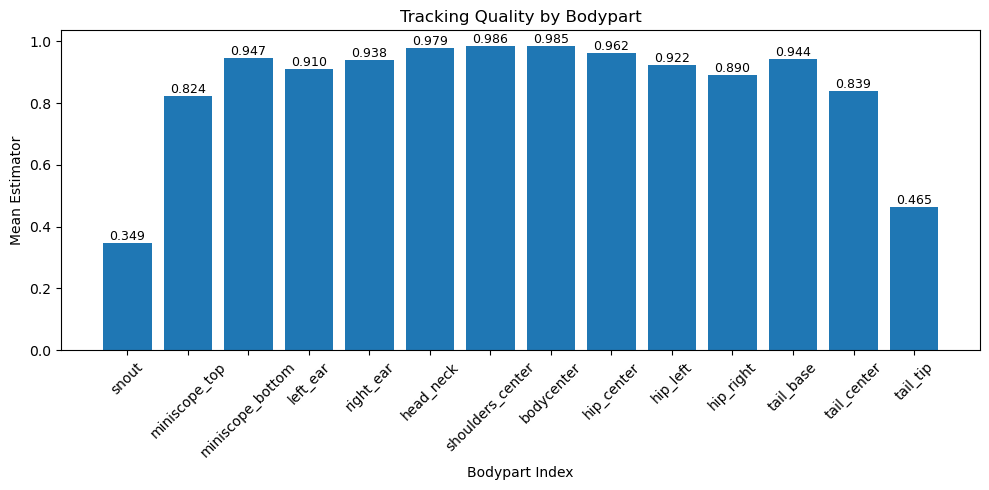

In [ ]:
# TODO: Calculate a summary statistic for each body part's estimator values
# Hint: Think about which single number best represents "overall accuracy"
estimator_stats = ...

############### Plotting ###############
plt.figure(figsize=(10, 5))

# Create the bar chart
bars = plt.bar(range(len(estimator_stats)), estimator_stats)

# Add numbers on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{estimator_stats.iloc[i]:.3f}',
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(len(estimator_stats)), bodyparts.columns, rotation=45)
plt.xlabel('Bodypart Index')
plt.ylabel('Mean Estimator')
plt.title('Tracking Quality by Bodypart')
plt.tight_layout()  # Prevents label cutoff
plt.show()

**Question 1.8**: What is the best tracked body part according to the estimator values? Why is your chosen operator more suitable to calculate the overall accuracy than others?

In [ ]:
# Answer for Question 1.8:
# What is the best tracked body part?
# Why is your chosen operator more suitable than others?

**Question 1.9**: The new estimator matrix differs in size. What are its dimensions? What do we have to keep in mind for programming when using this estimator matrix and draw conclusions for the raw matrix?

In [ ]:
# Answer for Question 1.9:
# What are the dimensions of the estimator matrix?
# What do we need to keep in mind when mapping back to the raw data?

## 4. Plot Trajectory
Let's plot the trajectory of the best-tracked body part based on your findings above. Use the index of the best body part to extract its X and Y coordinates and create a 2D trajectory plot.

Best tracking part: Index 6


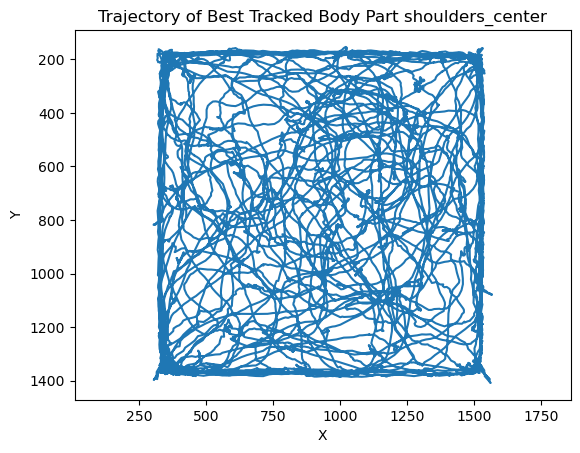

In [ ]:
# TODO: Find the index of the best-tracked body part using np.argmax()
best_idx = ...

# The estimator columns are at indices [3, 6, 9, ...]
# So the real column index for the estimator = 3 + best_idx * 3
# X is 2 columns before the estimator, Y is 1 column before

# TODO: Calculate the real column indices for X and Y
est_col_real_index = ...
x_col = ...
y_col = ...

x_coord = raw_tracking_data.iloc[:, x_col]
y_coord = raw_tracking_data.iloc[:, y_col]

plt.figure()
plt.plot(x_coord, y_coord)
plt.title(f'Trajectory of Best Tracked Body Part')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
# Invert Y axis because images usually have (0,0) at top-left
plt.gca().invert_yaxis()
plt.show()

---

## Congratulations! 🎉

You have successfully completed **Task 1: Tracking Data Analysis**!

You've learned important data analysis skills:
1. ✅ Loading and inspecting DeepLabCut tracking data
2. ✅ Understanding the data structure (X, Y, Likelihood triples)
3. ✅ Extracting and analyzing estimator quality metrics
4. ✅ Comparing body parts statistically using the mean
5. ✅ Identifying the most reliable tracking point
6. ✅ Visualizing animal trajectories

**Ready for Task 2!** 🚀